# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.


## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64
Max price for a coach ticket is $593.635, min price - $44.415, while average price is $376.58525308213905


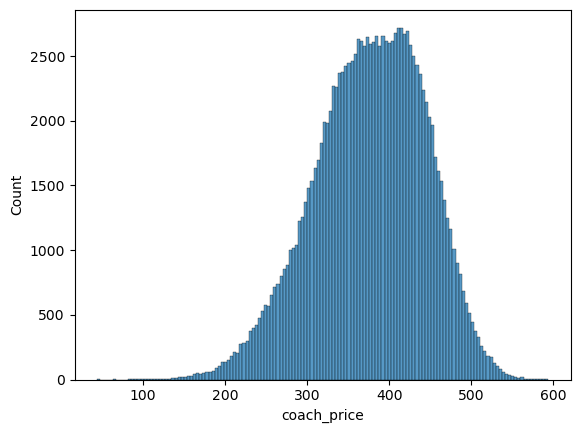

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

## Task 1
print(flight.coach_price.describe())
max_price = np.max(flight.coach_price)
min_price = np.min(flight.coach_price)
ave_price = np.mean(flight.coach_price)
print("Max price for a coach ticket is ${max_price}, min price - ${min_price}, while average price is ${ave_price}".\
      format(max_price=max_price, min_price=min_price, ave_price=ave_price))

sns.histplot(data=flight, x=flight.coach_price)
plt.show()
plt.clf()

$500 is high price in a first glance, but probably it depends on number of hours on flight

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

431.834377372817
437.115


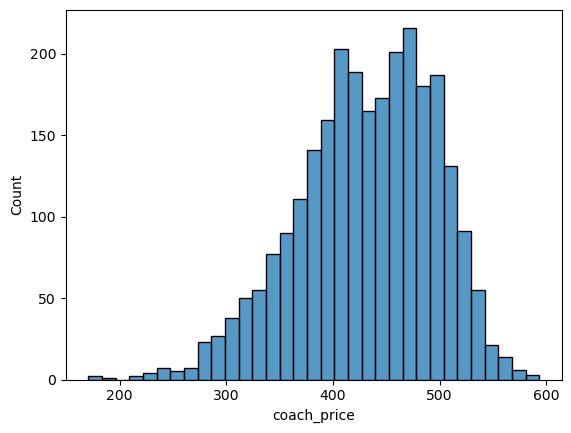

<Figure size 640x480 with 0 Axes>

In [2]:
## Task 2
print(flight.coach_price[flight.hours == 8].mean())
print(flight.coach_price[flight.hours == 8].median())
sns.histplot(data=flight, x=flight.coach_price[flight.hours == 8])
plt.show()
plt.clf()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

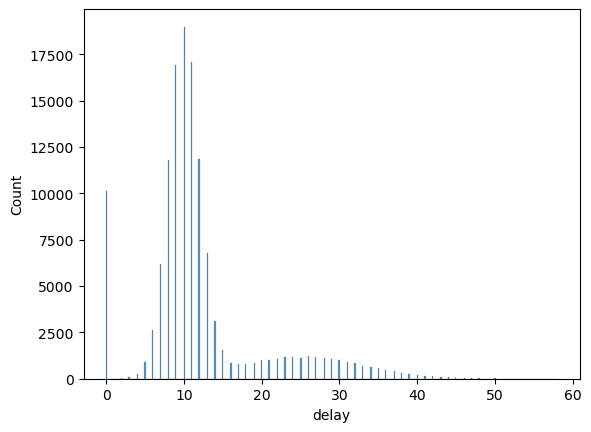

<Figure size 640x480 with 0 Axes>

In [3]:
## Task 3
sns.histplot(data=flight, x=flight.delay[flight.delay <= 200])
plt.show()
plt.clf()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

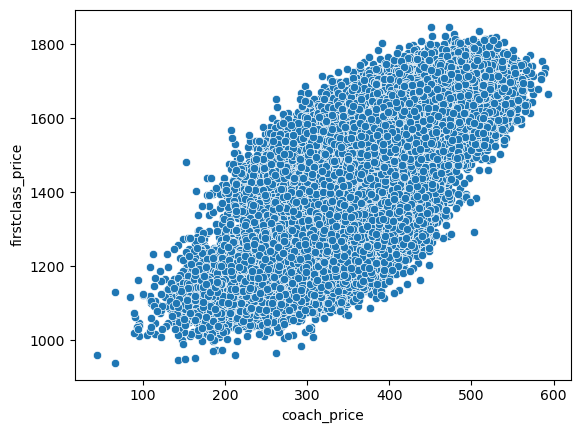

<Figure size 640x480 with 0 Axes>

In [4]:
## Task 4
sns.scatterplot(data=flight, x=flight.coach_price, y=flight.firstclass_price)
plt.show()
plt.clf()

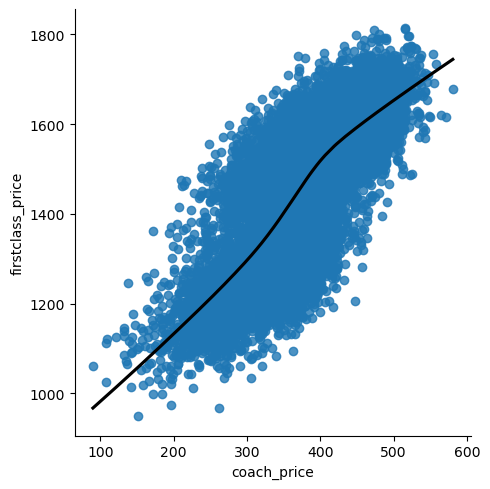

<Figure size 640x480 with 0 Axes>

In [5]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x="coach_price", y="firstclass_price", data=flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

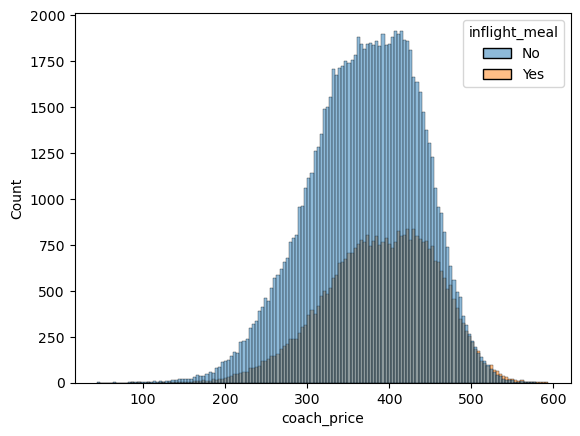

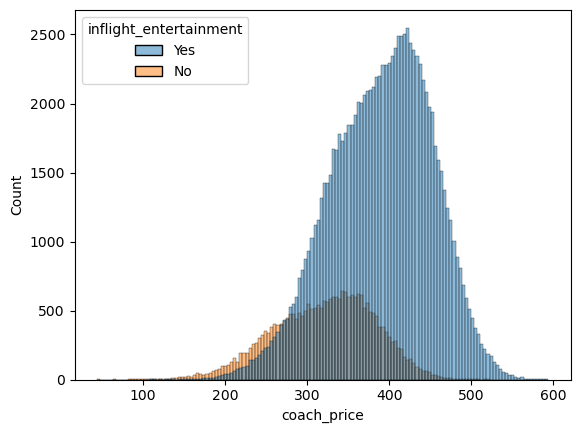

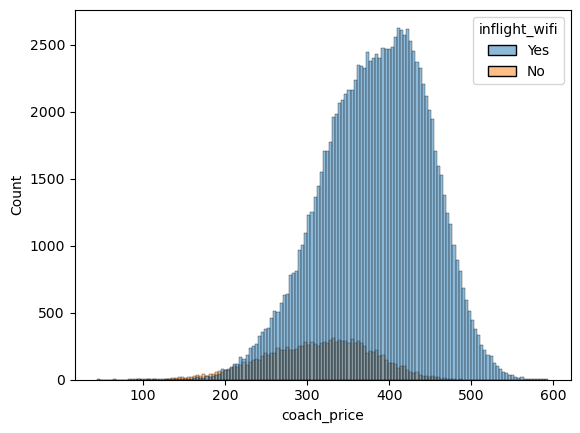

<Figure size 640x480 with 0 Axes>

In [6]:
## Task 5
sns.histplot(data=flight, x=flight.coach_price , hue=flight.inflight_meal)
plt.show()
plt.clf()

sns.histplot(data=flight, x=flight.coach_price , hue=flight.inflight_entertainment)
plt.show()
plt.clf()

sns.histplot(data=flight, x=flight.coach_price , hue=flight.inflight_wifi)
plt.show()
plt.clf()

6. How does the number of passengers change in relation to the length of flights?

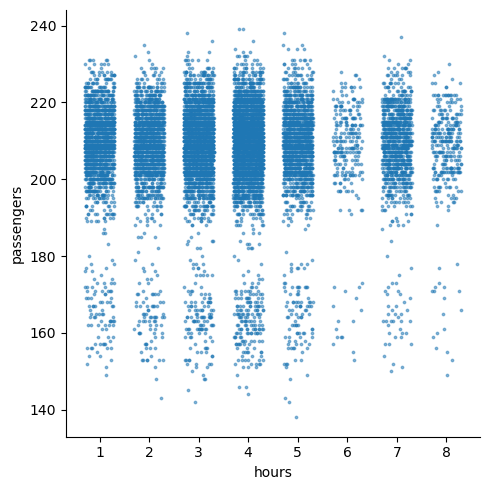

<Figure size 640x480 with 0 Axes>

In [7]:
## Task 6
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.3, scatter_kws={"s": 3, "alpha":0.5}, fit_reg = False)
plt.show()
plt.clf()


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

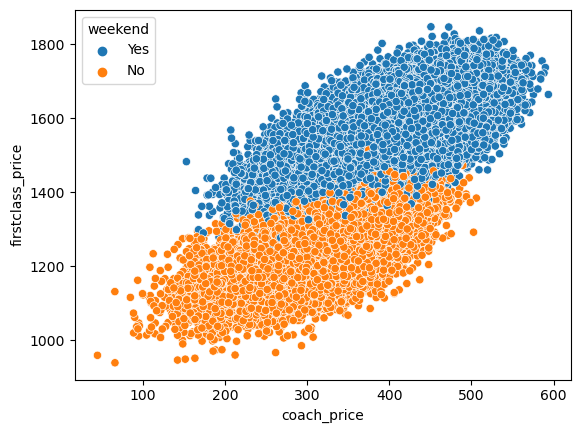

<function matplotlib.pyplot.clf()>

In [8]:
## Task 7
sns.scatterplot(data=flight, x=flight.coach_price, y=flight.firstclass_price, hue=flight.weekend)

plt.show()
plt.clf

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

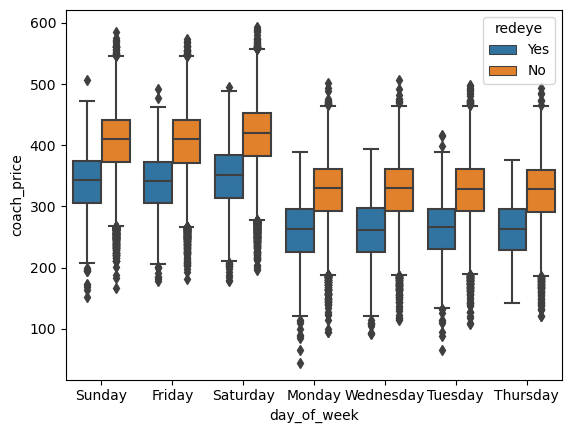

<Figure size 640x480 with 0 Axes>

In [9]:
## Task 8
sns.boxplot(data=flight, x=flight.day_of_week, y=flight.coach_price, hue=flight.redeye)

plt.show()
plt.clf()